In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity ,calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv(r"/home/rahul/jupyter prt/bikram sir/assignment/Leads.csv")

In [3]:
# pd.set_option('display.max_rows', 30)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
# df.isna().sum().sort_values(ascending=False).head(20)
# df.isna().mean().sort_values(ascending=False).head(20)*100
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df_obj = df[df.dtypes[df.dtypes == 'object'].index].head()
df_obj

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


In [7]:
df_float = df[df.dtypes[df.dtypes == 'float64'].index]
df_float

,TotalVisits,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,0.00,15.0,15.0
1,5.0,2.50,15.0,15.0
2,2.0,2.00,14.0,20.0
3,1.0,1.00,13.0,17.0
4,2.0,1.00,15.0,18.0
...,...,...,...,...
9235,8.0,2.67,15.0,17.0
9236,2.0,2.00,14.0,19.0
9237,2.0,2.00,13.0,20.0
9238,3.0,3.00,15.0,16.0


In [8]:
df_int = df[df.dtypes[df.dtypes == 'int'].index]
df_int

,Lead Number,Converted,Total Time Spent on Website
0,660737,0,0
1,660728,0,674
2,660727,1,1532
3,660719,0,305
4,660681,1,1428
...,...,...,...
9235,579564,1,1845
9236,579546,0,238
9237,579545,0,199
9238,579538,1,499


In [9]:
df.isna().mean().sort_values(ascending=False)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
df.replace('Select',np.nan, inplace= True)

In [11]:
df.isna().mean().sort_values(ascending=False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
df['How did you hear about X Education'].unique()

array([nan, 'Word Of Mouth', 'Other', 'Online Search', 'Multiple Sources',
       'Advertisements', 'Student of SomeSchool', 'Email', 'Social Media',
       'SMS'], dtype=object)

In [13]:
df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [14]:
df['Lead Profile'].unique()

array([nan, 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [15]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [17]:
df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
df['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [19]:
df['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [20]:
df['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [21]:
df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [22]:
df['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [23]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [24]:
df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [25]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [26]:
df['City'].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [27]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [29]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [30]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [31]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [32]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [33]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
df.drop(columns=['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score',
                'Asymmetrique Activity Score','Asymmetrique Profile Index','Lead Profile',
                'How did you hear about X Education','City','Country','Tags',
                 'What matters most to you in choosing a course'] , inplace=True , axis=1 )

df.drop(columns = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [35]:
df.isna().mean().sort_values(ascending=False)*100

Specialization                            36.580087
What is your current occupation           29.112554
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [36]:
# df['City'].unique()
# df['City'].value_counts()
# df['City'].replace(np.nan,'Other_city', inplace = True)
# Fill missing value by interpolate method
# df.City.interpolate(method ='pad', limit_direction='forward', axis=0, inplace = True)
# df['City'].value_counts()

In [37]:
# df.Country.unique()
# df.Country.value_counts()
# count_fl = df['Country'].mode()[0]
# df['Country']=df['Country'].fillna(count_fl)

In [38]:
# df['What matters most to you in choosing a course'].unique()
# df['What matters most to you in choosing a course'].value_counts()
# df['What matters most to you in choosing a course'].replace(np.nan,'Other', inplace = True)

In [39]:
# df['What is your current occupation'].unique()
# df['What is your current occupation'].value_counts()
# df['What is your current occupation'].replace(np.nan,'Reserved_data', inplace = True)

In [40]:
# df.Tags.unique()
# df.Tags.value_counts()
# df['Tags'].replace(np.nan,'Reserved_data', inplace = True)

In [41]:
# df['Specialization'].unique()
# df['Specialization'].value_counts()
# df['Specialization'].replace(np.nan,'Other_speciality', inplace = True)
# df['Specialization'].value_counts()

In [42]:
# for fl in df_float:
#     fl_fil = df[fl].median()
#     df[fl]=df[fl].fillna(fl_fil)

# count_fl = df['Last Activity'].mode()[0]
# df['Last Activity']=df['Last Activity'].fillna(count_fl)


# count_fl = df['City'].mode()[0]
# df['City'] = df['City'].fillna(count_fl)



# tv_fl = df['TotalVisits'].mode()[0]
# df['TotalVisits'] = df['TotalVisits'].fillna(tv_fl)

# pv_fl = df['Page Views Per Visit'].mode()[0]
# df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(pv_fl)

# ls_fl = df['Lead Source'].mode()[0]
# df['Lead Source'] = df['Lead Source'].fillna(ls_fl)

# for fl in df_int:
#     int_fil = df[fl].mean()
#     df[fl]=df[fl].fillna(int_fil)
# for fl in df_obj:
#     chr_fl = df[fl].mode()[0]
#     df[fl] = df[fl].fillna(chr_fl)

In [43]:
df = df[~pd.isnull(df['What is your current occupation'])]

In [44]:
df = df[~pd.isnull(df['Specialization'])]

In [45]:
df = df[~pd.isnull(df['TotalVisits'])]

In [46]:
df = df[~pd.isnull(df['Last Activity'])]

In [47]:
df = df[~pd.isnull(df['Lead Source'])]

In [48]:
df.isna().mean().sort_values(ascending=False)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

<AxesSubplot:>

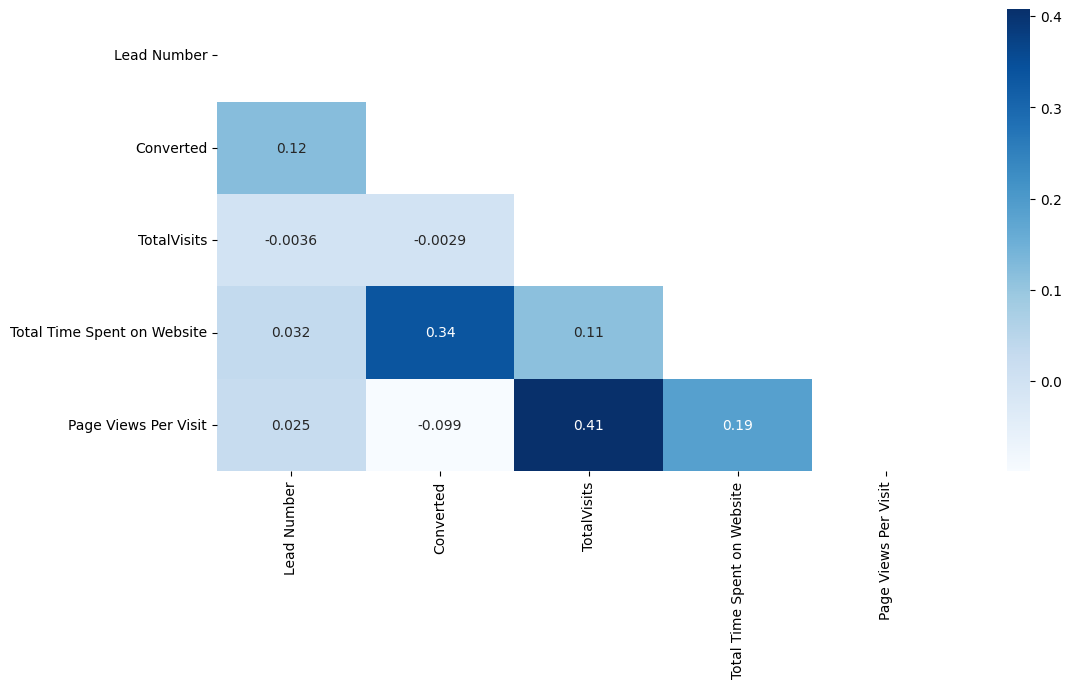

In [49]:
# Correlations
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

In [50]:
df.drop_duplicates(inplace = True)

In [51]:
df.head()
df.shape , df.columns

((4535, 14),
 Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
        'Do Not Email', 'Converted', 'TotalVisits',
        'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
        'Specialization', 'What is your current occupation',
        'A free copy of Mastering The Interview', 'Last Notable Activity'],
       dtype='object'))

In [52]:
print(len(df.index))
print(len(df.index)/9240)

4535
0.4908008658008658


In [53]:
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [54]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.0,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.0,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [55]:
# Check the columns which are of type 'object'
# temp = df.loc[:, df.dtypes == 'float']
# temp.columns
dfobj = df[df.dtypes[df.dtypes == 'object'].index].head()
dfflt = df[df.dtypes[df.dtypes == 'float'].index].head()
dfint = df[df.dtypes[df.dtypes == 'int'].index].head()
dfobj.columns  , dfint.columns , dfflt.columns

(Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
        'Specialization', 'What is your current occupation',
        'A free copy of Mastering The Interview', 'Last Notable Activity'],
       dtype='object'),
 Index(['Converted', 'Total Time Spent on Website'], dtype='object'),
 Index(['TotalVisits', 'Page Views Per Visit'], dtype='object'))

In [56]:
# sns.histplot(df['Total Time Spent on Website'])
# plt.show()
# df['Total Time Spent on Website'] = np.log(df['Total Time Spent on Website'])

# sns.histplot(df['Total Time Spent on Website'])

In [57]:
# y_box_cox = power_transform(np.expand_dims(df['Total Time Spent on Website'], axis=1), method='box-cox').flatten()
# sns.distplot(a=y_box_cox, kde=True)

# df['Total Time Spent on Website'] = np.log(df['Total Time Spent on Website'])

# sns.distplot(df['Total Time Spent on Website'])
# plt.show()
# sns.boxplot(df['Total Time Spent on Website'])

In [58]:
# sns.histplot(df['TotalVisits'])
# plt.show()

In [59]:
# Q1 = df['TotalVisits'].quantile(0.25)
# Q3 = df['TotalVisits'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 
# Lower_tail = Q1 - 1.5 * IQR
# Upper_tail = Q3 + 1.5 * IQR
# for i in df:
#     if i > Upper_tail or i < Lower_tail:
#         out.append(i)
#     print("Outliers:",out)

In [60]:
# df['TotalVisits'] = np.log(df['TotalVisits'])
# sns.distplot(df['TotalVisits'])
# plt.show()

In [61]:
# sns.distplot(df['Page Views Per Visit'])
# plt.show()

In [62]:
# df['Page Views Per Visit'] = np.log(df['Page Views Per Visit'])

# sns.distplot(df['Page Views Per Visit'])
# plt.show()

In [63]:
# sns.pairplot(df)

In [64]:
df.shape

(4535, 12)

In [65]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [66]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
df = pd.concat([df, dummy_spl], axis = 1)

In [67]:
# Drop the variables for which the dummy variables have been created

df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [68]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,2.0,1640,2.00,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10,1,8.0,1351,8.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,1,8.0,1343,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df.drop(columns='Converted', axis=1)
y = df[['Converted']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size=0.25,random_state=2529)
X_train.shape , y_train.shape ,X_test.shape , y_test.shape

((3401, 73), (3401, 1), (1134, 73), (1134, 1))

In [71]:
s =X_train.columns
s[0:3]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [72]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [73]:
# X_train=pd.DataFrame(X_train)
# X_train.columns=X_train.columns

In [74]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4877,-0.059260,0.930807,0.484129,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4531,0.611436,0.733384,0.484129,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2029,0.946784,-0.833662,-0.197518,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8812,-0.394608,0.888502,-0.424733,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5158,-0.394608,1.242805,-0.424733,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,-0.226934,-0.306613,-0.651949,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3548,-0.562283,-0.941187,-0.879164,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9139,0.108414,-0.643290,0.938559,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7610,0.276088,-0.743764,1.392990,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
# categorial_features = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
#         'Specialization', 'What is your current occupation',
#         'A free copy of Mastering The Interview', 'Last Notable Activity']

# numerical_features = ['TotalVisits', 'Total Time Spent on Website',
#        'Page Views Per Visit']

In [76]:
# one_hot = OneHotEncoder(drop='first', handle_unknown = 'ignore', sparse=False)
# scaler = StandardScaler()

# tranformer = ColumnTransformer([("one_hot", one_hot, categorial_features),
#                                 ("standard_scaler", scaler, numerical_features)],
#                                remainder = "passthrough")

In [77]:
# X_train = tranformer.fit_transform(X_train)
# X_test  = tranformer.fit_transform(X_test)

In [78]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [79]:
# SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem.
# SMOTE for Imbalanced Classification
# This is a type of data augmentation for the minority class and is referred to as 
# the Synthetic Minority Oversampling Technique, or SMOTE for short.

#SMOTENC

# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=42)
# X_train,y_train = os.fit_resample(X_train, y_train)

## LogisticRegression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [82]:
# Use 'predict' to predict the probabilities on the train set

y_pred = lr_model.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_pred))

0.7901234567901234


In [84]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lr_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lr_model.score(X_test, y_test)))

Training set score: 0.8054
Test set score: 0.7901


In [85]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[454 112]
 [126 442]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       566
           1       0.80      0.78      0.79       568

    accuracy                           0.79      1134
   macro avg       0.79      0.79      0.79      1134
weighted avg       0.79      0.79      0.79      1134



## RFE

In [86]:
from sklearn.feature_selection import RFE

lr_model1 = RFE(lr_model, n_features_to_select = 15, step=1)             # running RFE with 15 variables as output
lr_model1 = lr_model1.fit(X_train, y_train)

In [87]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train, lr_model1.support_, lr_model1.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 55),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 20),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_testone', False, 59),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_

In [88]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[lr_model1.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [89]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [90]:
X_test = X_test[col]

In [91]:
# Import RFE and select 15 variables

# RFE is popular because it is easy to configure and use and because it is effective at selecting
# those features (columns) in a training dataset
# that are more or most relevant in predicting the target variable

# from sklearn.feature_selection import RFE
# rfe = RFE(lr_model, 20)             # running RFE with 15 variables as output
# rfe = rfe.fit(X_train, y_train)



# Let's take a look at which features have been selected by RFE

# list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [92]:
import statsmodels

import statsmodels.api as sm

In [93]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)

lr_model2 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
fnl = lr_model2.fit()
fnl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3401
Model:                            GLM   Df Residuals:                     3386
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1526.9
Date:                Sat, 19 Nov 2022   Deviance:                       3053.8
Time:                        15:58:57   Pearson chi2:                 3.85e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3859
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                              1.0342      0.049     20.942      0.000       0.937       1.131
Lead Origin_Landing Page Submission                     -1.1544      0.124     -9.284      0.000      -1.398      -0.911
Lead Origin_Lead Add Form                                0.8584      0.949      0.904      0.366      -1.002       2.719
Lead Source_Reference                                    2.3321      1.004      2.322      0.020       0.363       4.301
Lead Source_Welingak Website                            23.8365   3.89e+04      0.001      1.000   -7.61e+04    7.62e+04
Do Not Email_Yes                                        -1.1801      0.216     -5.453      0.000      -1.604      -0.756
Last Activity_Email Opened                               0.5641      0.127      4.426      0.000       0.314       0.814
Last Activity_Had a Phone Conversation                   0.4058      1.303      0.312      0.755      -2.147       2.959
Last Activity_SMS Sent                                   1.3692      0.134     10.228      0.000       1.107       1.632
What is your current occupation_Housewife               24.8438   4.51e+04      0.001      1.000   -8.83e+04    8.84e+04
What is your current occupation_Unemployed               0.0372      0.147      0.252      0.801      -0.252       0.326
What is your current occupation_Working Professional     2.7536      0.248     11.110      0.000       2.268       3.239
Last Notable Activity_Had a Phone Conversation          24.9586   3.64e+04      0.001      0.999   -7.14e+04    7.14e+04
Last Notable Activity_Modified                          -0.5544      0.114     -4.863      0.000      -0.778      -0.331
Last Notable Activity_Unreachable                       24.6116   2.76e+04      0.001      0.999   -5.42e+04    5.42e+04
========================================================================================================================
"""

In [95]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,55.68
3,Lead Source_Reference,53.26
10,What is your current occupation_Unemployed,9.20
1,Lead Origin_Landing Page Submission,5.99
6,Last Activity_Email Opened,3.19
8,Last Activity_SMS Sent,3.04
4,Lead Source_Welingak Website,3.00
7,Last Activity_Had a Phone Conversation,2.53
12,Last Notable Activity_Had a Phone Conversation,2.52
11,What is your current occupation_Working Profes...,2.41


In [96]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [97]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [98]:
X_train.drop('Last Notable Activity_Modified', axis = 1, inplace = True)

In [99]:
lr_model3 = sm.GLM(y_train, X_train, family = sm.families.Binomial())
LRMF = lr_model3.fit()
LRMF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3401
Model:                            GLM   Df Residuals:                     3389
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1544.8
Date:                Sat, 19 Nov 2022   Deviance:                       3089.7
Time:                        15:58:58   Pearson chi2:                 3.97e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                              1.0311      0.049     20.993      0.000       0.935       1.127
Lead Origin_Landing Page Submission                     -1.1550      0.123     -9.426      0.000      -1.395      -0.915
Lead Origin_Lead Add Form                                2.9479      0.337      8.741      0.000       2.287       3.609
Lead Source_Welingak Website                            20.6813   2.37e+04      0.001      0.999   -4.63e+04    4.64e+04
Do Not Email_Yes                                        -1.1441      0.214     -5.337      0.000      -1.564      -0.724
Last Activity_Email Opened                               0.8124      0.117      6.944      0.000       0.583       1.042
Last Activity_Had a Phone Conversation                   0.2380      1.280      0.186      0.852      -2.271       2.747
Last Activity_SMS Sent                                   1.6290      0.124     13.176      0.000       1.387       1.871
What is your current occupation_Unemployed              -0.3062      0.131     -2.335      0.020      -0.563      -0.049
What is your current occupation_Working Professional     2.4151      0.237     10.172      0.000       1.950       2.880
Last Notable Activity_Had a Phone Conversation          24.4655   2.21e+04      0.001      0.999   -4.32e+04    4.33e+04
Last Notable Activity_Unreachable                       23.9578   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
========================================================================================================================
"""

In [100]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,((X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3401
Model:                            GLM   Df Residuals:                     3389
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1544.8
Date:                Sat, 19 Nov 2022   Deviance:                       3089.7
Time:                        15:58:58   Pearson chi2:                 3.97e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                              1.0311      0.049     20.993      0.000       0.935       1.127
Lead Origin_Landing Page Submission                     -1.1550      0.123     -9.426      0.000      -1.395      -0.915
Lead Origin_Lead Add Form                                2.9479      0.337      8.741      0.000       2.287       3.609
Lead Source_Welingak Website                            20.6813   2.37e+04      0.001      0.999   -4.63e+04    4.64e+04
Do Not Email_Yes                                        -1.1441      0.214     -5.337      0.000      -1.564      -0.724
Last Activity_Email Opened                               0.8124      0.117      6.944      0.000       0.583       1.042
Last Activity_Had a Phone Conversation                   0.2380      1.280      0.186      0.852      -2.271       2.747
Last Activity_SMS Sent                                   1.6290      0.124     13.176      0.000       1.387       1.871
What is your current occupation_Unemployed              -0.3062      0.131     -2.335      0.020      -0.563      -0.049
What is your current occupation_Working Professional     2.4151      0.237     10.172      0.000       1.950       2.880
Last Notable Activity_Had a Phone Conversation          24.4655   2.21e+04      0.001      0.999   -4.32e+04    4.33e+04
Last Notable Activity_Unreachable                       23.9578   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
========================================================================================================================
"""

In [101]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [102]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [103]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [104]:
X_train.drop('Last Notable Activity_Unreachable', axis = 1, inplace = True)

In [105]:
X_test.drop(columns=['Last Notable Activity_Unreachable','Last Notable Activity_Had a Phone Conversation',
            'Last Activity_Had a Phone Conversation','Lead Source_Welingak Website','Last Notable Activity_Modified',
            'Lead Source_Reference','What is your current occupation_Housewife'],
             axis = 1, inplace = True)

In [106]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,((X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3401
Model:                            GLM   Df Residuals:                     3393
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.7
Date:                Sat, 19 Nov 2022   Deviance:                       3141.5
Time:                        15:58:58   Pearson chi2:                 4.05e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3699
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Total Time Spent on Website                              1.0210      0.049     21.004      0.000       0.926       1.116
Lead Origin_Landing Page Submission                     -1.1523      0.121     -9.505      0.000      -1.390      -0.915
Lead Origin_Lead Add Form                                3.0139      0.335      8.998      0.000       2.357       3.670
Do Not Email_Yes                                        -1.2056      0.213     -5.655      0.000      -1.624      -0.788
Last Activity_Email Opened                               0.6949      0.114      6.101      0.000       0.472       0.918
Last Activity_SMS Sent                                   1.5084      0.120     12.526      0.000       1.272       1.744
What is your current occupation_Unemployed              -0.1829      0.128     -1.424      0.154      -0.435       0.069
What is your current occupation_Working Professional     2.5266      0.236     10.722      0.000       2.065       2.988
========================================================================================================================
"""

In [107]:
lrm=LogisticRegression()
lrm.fit(X_train,y_train)

LogisticRegression()

In [108]:
ypredd = lrm.predict(X_test)
ypredd

array([0, 0, 0, ..., 0, 1, 0])

In [109]:
print(accuracy_score(y_test, y_pred))

0.7901234567901234


In [110]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lrm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lrm.score(X_test, y_test)))

Training set score: 0.7939
Test set score: 0.7857


In [155]:
import joblib

In [156]:
joblib.dump(lrm,'lrmodel.joblib')

['lrmodel.joblib']

In [157]:
ld = joblib.load('lrmodel.joblib')

In [159]:
print(ld.predict([[0,1,0,1,0,1,0,0]]))

[0]


In [3]:
import pandas as pd

In [4]:
dict = {'a':[1,2,3,4], 'b':[3,4,5,6], 'c':[0,9,8,1], 'd':[0,9,9,9],'e':["p","r","q","s"]}
dT = pd.DataFrame.from_dict(dict,orient='index').T
dT

,a,b,c,d,e
0,1,3,0,0,p
1,2,4,9,9,r
2,3,5,8,9,q
3,4,6,1,9,s


In [14]:
dT['p']=dT['e'].map(lambda x: 1 if x=='p' else 0)
dT[0]

KeyError: 0

In [15]:
dT['r']=dT['e'].map(lambda x: 1 if x=='r' else 0)
dT

,a,b,c,d,e,p,r
0,1,3,0,0,p,1,0
1,2,4,9,9,r,0,1
2,3,5,8,9,q,0,0
3,4,6,1,9,s,0,0


In [116]:
# Import statsmodels

# import statsmodels.api as sm

In [117]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

# X_train_sm = sm.add_constant(X_train)
# logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# res = logm2.fit()
# res.summary()

In [118]:
# Use 'predict' to predict the probabilities on the train set

# y_train_pred = lr_model.predict(X_train)
# y_train_pred[:10]

In [119]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

# y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
# y_train_pred_final.head()

In [120]:
# y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# # Let's see the head
# y_train_pred_final.head()

In [121]:
# y_pred_test = lr_model.predict(X_test)

# y_pred_test

# print(accuracy_score(y_test, y_pred_test))

In [122]:
# print the scores on training and test set

# print('Training set score: {:.4f}'.format(lr_model.score(X_train, y_train)))

# print('Test set score: {:.4f}'.format(lr_model.score(X_test, y_test)))

In [123]:
# print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test))
# print('\n')
# print('Classification Report:\n', classification_report(y_test, y_pred_test))

In [124]:
# Print the Confusion Matrix and slice it into four pieces

# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred_test)

# print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

##  The confusion matrix shows 1349 + 819 = 2186 correct predictions and 74 + 68 = 142 incorrect predictions.

In [125]:
# # visualize confusion matrix with seaborn heatmap

# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [126]:
# TP = cm[0,0]
# TN = cm[1,1]
# FP = cm[0,1]
# FN = cm[1,0]

In [127]:
# classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

# print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


In [128]:
# # print classification error

# classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print('Classification error : {0:0.4f}'.format(classification_error))

In [129]:
# print precision score

# precision = TP / float(TP + FP)


# print('Precision : {0:0.4f}'.format(precision))

# recall = TP / float(TP + FN)

# print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [130]:
# true_positive_rate = TP / float(TP + FN)

# print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# false_positive_rate = FP / float(FP + TN)


# print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [131]:
# specificity = TN / (TN + FP)

# print('Specificity : {0:0.4f}'.format(specificity))

## RandomForestClassifier

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)
print(accuracy_score(y_test, prediction3))

0.7328042328042328


In [134]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

Confusion Matrix:
 [[412 154]
 [149 419]]


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       566
           1       0.73      0.74      0.73       568

    accuracy                           0.73      1134
   macro avg       0.73      0.73      0.73      1134
weighted avg       0.73      0.73      0.73      1134



In [135]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 0.9438
Test set score: 0.7328


## XGBRegressor

In [136]:
from xgboost import XGBRegressor
import xgboost

In [137]:
# regressor=xgboost.XGBRegressor(eval_metric='rmsle')
# from sklearn.model_selection import GridSearchCV
# # set up our search grid
# param_grid = {"max_depth":
# [4, 5,],
# "n_estimators": [500, 600, 700,555,666],
# "learning_rate": [0.001,0.015]
# }
# # try out every combination of the above values
# search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
# print("The best hyperparameters are ",search.best_params_)

In [138]:
regressor = xgboost.XGBRegressor(learning_rate = 0.01,n_estimators = 500,max_depth = 4,eval_metric='rmsle')
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [139]:
y_pred1 = regressor.predict(X_test)
y_pred1

# make predictions for test data
y_predd = regressor.predict(X_test)
predictionss = [round(value) for value in y_predd]

In [140]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, predictionss))

Confusion Matrix:
 [[454 112]
 [126 442]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       566
           1       0.80      0.78      0.79       568

    accuracy                           0.79      1134
   macro avg       0.79      0.79      0.79      1134
weighted avg       0.79      0.79      0.79      1134

accuracy_score 0.8156966490299824


In [141]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(regressor.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(regressor.score(X_test, y_test)))

Training set score: 0.4688
Test set score: 0.4402


In [142]:
# print the scores on training and test set

# print('Training set score: {:.4f}'.format(regressor.score(X_train, y_train)))

# print('Test set score: {:.4f}'.format(regressor.score(X_test, y_test)))

In [143]:
# print('Confusion Matrix:\n', confusion_matrix(y_test, predictionss))
# print('\n')
# print('Classification Report:\n', classification_report(y_test, predictionss))

In [144]:
# df_obj.columns

In [145]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [146]:
# df.drop_duplicates()

## EDA

In [147]:
# from pandas_profiling import ProfileReport

In [148]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

In [149]:
# df.shape

In [150]:
# kmo_all, kmo_model = calculate_kmo(df_int)
# kmo_all, kmo_model

In [151]:
# chi_square_value,p_value=calculate_bartlett_sphericity(df_obj)
# chi_square_value, p_value

In [152]:
# lr_model.predict(X_test)

In [153]:
# import joblib
# joblib.dump(fnl,'log_reg_model.joblib')
# hj = joblib.load('log_reg_model.joblib')
# hj.predict([[1,131,167,1,8,9,0,8,1,1,1,1,1,1,6]])

In [154]:
# {
#     "total_visits": 5,
#     "total_time_spent_on_website": 0,
#     "page_views_per_visit": 4,
#     "lead_source": "google",
#     "last_activity": "Email Received",
#     "specialization": "Media and Advertising",
#     "search": "No",
#     "newspaper": "No",
#     "last_notable_activity": "Unreachable"
# }